In [1]:
!apt -qq -y install fonts-nanum
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [2]:
# 구글드라이브 연동
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

# 구글 드라이브 파일 확인
!ls '/gdrive/MyDrive/Colab Notebooks/180일/프로젝트/1_2/'            # 자기 경로를 쓰기

# 반복되는 드라이브 경로 변수화
drive_path = '/gdrive/MyDrive/Colab Notebooks/180일/프로젝트/1_2/'

Mounted at /gdrive
중간저장	   list.txt	  reviews_2.csv  reviews.csv
google_review.csv  reviews_1.csv  reviews_3.csv  star_time.csv


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
import pandas as pd
import numpy as np
import collections
import nltk

In [ ]:
!pip install JPype1-1.2.0-cp38-cp38-win_amd64.whl
!pip install konlpy==0.5.2
!pip install tweepy==3.10.0

In [5]:
from konlpy.tag import Okt

In [7]:
reviews = pd.read_csv(drive_path + 'google_review.csv', encoding='utf-8')
reviews.head()

,star,time,review_content
0,5,0,전북 전주 한옥마을한옥들이 즐비한 한옥마을 ~~날씨가 선선해서 여행하기 좋았습니다....
1,5,0,"1박 2일로 전주한옥마을 방문했었는데, 전라도를 다녀온 사람들은 다들 바가지 안씌우..."
2,5,0,4번째 방문입니다.어디로 가든 중간에 들려서 2~3시간은 걷고 먹고 즐기는 코스입니...
3,4,0,한옥마을 다니려면 오전에 공영주차장에 주차를 하고 다니면 좋을것 같아요오후에는 금방...
4,5,0,가족들과 함께 어린이날에 방문했는데 사람들이 겁나 많았고 가는데도 시간이 4시간 정...


In [8]:
review_content = reviews['review_content'].tolist()
review_content = ' '.join(review_content)

In [9]:
tokenizer = Okt()
raw_pos_tagged = tokenizer.pos(review_content, norm=True, stem=True) # POS Tagging

# 형태소와 형태소 종류를 튜플로 묶어서 리스트로 만들어준다.
raw_pos_tagged

[('전북', 'Noun'),
 ('전주', 'Noun'),
 ('한', 'Determiner'),
 ('옥', 'Noun'),
 ('마을', 'Noun'),
 ('한', 'Determiner'),
 ('옥', 'Noun'),
 ('들', 'Suffix'),
 ('이', 'Josa'),
 ('즐비하다', 'Adjective'),
 ('한', 'Determiner'),
 ('옥', 'Noun'),
 ('마을', 'Noun'),
 ('~~', 'Punctuation'),
 ('날씨', 'Noun'),
 ('가', 'Josa'),
 ('선선', 'Noun'),
 ('하다', 'Verb'),
 ('여행', 'Noun'),
 ('하다', 'Verb'),
 ('좋다', 'Adjective'),
 ('.', 'Punctuation'),
 ('맛집', 'Noun'),
 ('들', 'Suffix'),
 ('도', 'Josa'),
 ('많다', 'Adjective'),
 ('예쁘다', 'Adjective'),
 ('카페', 'Noun'),
 ('들', 'Suffix'),
 ('도', 'Josa'),
 ('완전', 'Noun'),
 ('많다', 'Adjective'),
 ('.', 'Punctuation'),
 ('주변', 'Noun'),
 ('에', 'Josa'),
 ('경', 'Modifier'),
 ('기전', 'Noun'),
 ('등', 'Noun'),
 ('유명', 'Noun'),
 ('명소', 'Noun'),
 ('들', 'Suffix'),
 ('도', 'Josa'),
 ('있다', 'Adjective'),
 ('여행', 'Noun'),
 ('하다', 'Verb'),
 ('좋다', 'Adjective'),
 ('.', 'Punctuation'),
 ('국내', 'Noun'),
 ('최대', 'Noun'),
 ('규모', 'Noun'),
 ('의', 'Josa'),
 ('전통', 'Noun'),
 ('한', 'Determiner'),
 ('옥촌', 'Noun'),
 ('

In [10]:
del_list = ['하다', '있다', '되다', '이다', '돼다', '않다', '그렇다', '아니다', '이렇다', '그렇다', '어떻다'] 

word_cleaned = []
for word in raw_pos_tagged: #  ('서울', 'Noun'),
    # 튜플은 이렇게 꺼낼 수 있다.
    if word[1] in ['Noun']: # Foreign == ”, “ 와 같이 제외되어야할 항목들
        if (len(word[0]) != 1) & (word[0] not in del_list): # 한 글자로 이뤄진 단어들을 제외 & 원치 않는 단어들을 제외
            word_cleaned.append(word[0])
        
word_cleaned

['전북',
 '전주',
 '마을',
 '마을',
 '날씨',
 '선선',
 '여행',
 '맛집',
 '카페',
 '완전',
 '주변',
 '기전',
 '유명',
 '명소',
 '여행',
 '국내',
 '최대',
 '규모',
 '전통',
 '옥촌',
 '전통',
 '문화',
 '공존',
 '여행지',
 '전주',
 '마을',
 '마을',
 '전라북도',
 '전주시',
 '풍남동',
 '교동',
 '위치',
 '여기',
 '우리',
 '한국',
 '전통',
 '건물',
 '이상',
 '밀집',
 '급변',
 '도시',
 '우리',
 '그대로',
 '간직',
 '한국',
 '전통',
 '마을',
 '여행',
 '비빔밥',
 '마을',
 '먼저',
 '소리',
 '화관',
 '이란',
 '내부',
 '연못',
 '고무신',
 '둥둥',
 '과연',
 '의미',
 '예전',
 '명인',
 '명창',
 '산위',
 '수련',
 '고무신',
 '소리',
 '공부',
 '장단',
 '모래',
 '조약돌',
 '고무신',
 '가득',
 '정도',
 '수련',
 '심혈',
 '소리',
 '공부',
 '고무신',
 '풀이',
 '정도',
 '시간',
 '득음',
 '과정',
 '예나',
 '지금',
 '역시',
 '그냥',
 '저절로',
 '전주',
 '조선',
 '건국',
 '태조',
 '이성계',
 '본향',
 '태조',
 '조부',
 '목조',
 '이안사',
 '함경북도',
 '동북',
 '이주',
 '선대',
 '조선왕조',
 '건국',
 '기념',
 '전주',
 '기전',
 '건립',
 '여기',
 '태조',
 '어진',
 '초상화',
 '봉안',
 '왕조',
 '경사',
 '의미',
 '내부',
 '전시관',
 '중앙',
 '자만',
 '금표',
 '금표',
 '바로',
 '연산군',
 '본인',
 '여가',
 '활동',
 '사냥',
 '위해',
 '백성',
 '이주',
 '기전',
 '초상화',
 '역대',
 '임금',
 '가장',
 '보고',
 '얼굴',
 '과연

In [11]:
word_dic = {}

for word in word_cleaned:
    if word not in word_dic:
        word_dic[word] = 1 # changed from "0" to "1"
    else:
        word_dic[word] += 1
        
word_dic

{'전북': 10,
 '전주': 617,
 '마을': 1709,
 '날씨': 96,
 '선선': 11,
 '여행': 194,
 '맛집': 177,
 '카페': 97,
 '완전': 31,
 '주변': 106,
 '기전': 175,
 '유명': 23,
 '명소': 57,
 '국내': 13,
 '최대': 9,
 '규모': 27,
 '전통': 484,
 '옥촌': 4,
 '문화': 107,
 '공존': 22,
 '여행지': 49,
 '전라북도': 5,
 '전주시': 30,
 '풍남동': 6,
 '교동': 20,
 '위치': 31,
 '여기': 86,
 '우리': 81,
 '한국': 233,
 '건물': 94,
 '이상': 46,
 '밀집': 11,
 '급변': 1,
 '도시': 59,
 '그대로': 20,
 '간직': 9,
 '비빔밥': 146,
 '먼저': 8,
 '소리': 16,
 '화관': 7,
 '이란': 5,
 '내부': 24,
 '연못': 1,
 '고무신': 6,
 '둥둥': 1,
 '과연': 7,
 '의미': 33,
 '예전': 147,
 '명인': 1,
 '명창': 1,
 '산위': 1,
 '수련': 2,
 '공부': 12,
 '장단': 1,
 '모래': 1,
 '조약돌': 1,
 '가득': 44,
 '정도': 180,
 '심혈': 1,
 '풀이': 2,
 '시간': 234,
 '득음': 1,
 '과정': 4,
 '예나': 1,
 '지금': 45,
 '역시': 54,
 '그냥': 244,
 '저절로': 3,
 '조선': 20,
 '건국': 3,
 '태조': 32,
 '이성계': 32,
 '본향': 1,
 '조부': 1,
 '목조': 3,
 '이안사': 1,
 '함경북도': 1,
 '동북': 1,
 '이주': 3,
 '선대': 1,
 '조선왕조': 5,
 '기념': 8,
 '건립': 2,
 '어진': 33,
 '초상화': 9,
 '봉안': 4,
 '왕조': 4,
 '경사': 1,
 '전시관': 23,
 '중앙': 7,
 '자만': 10,
 '금표': 2,

In [13]:
import nltk
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

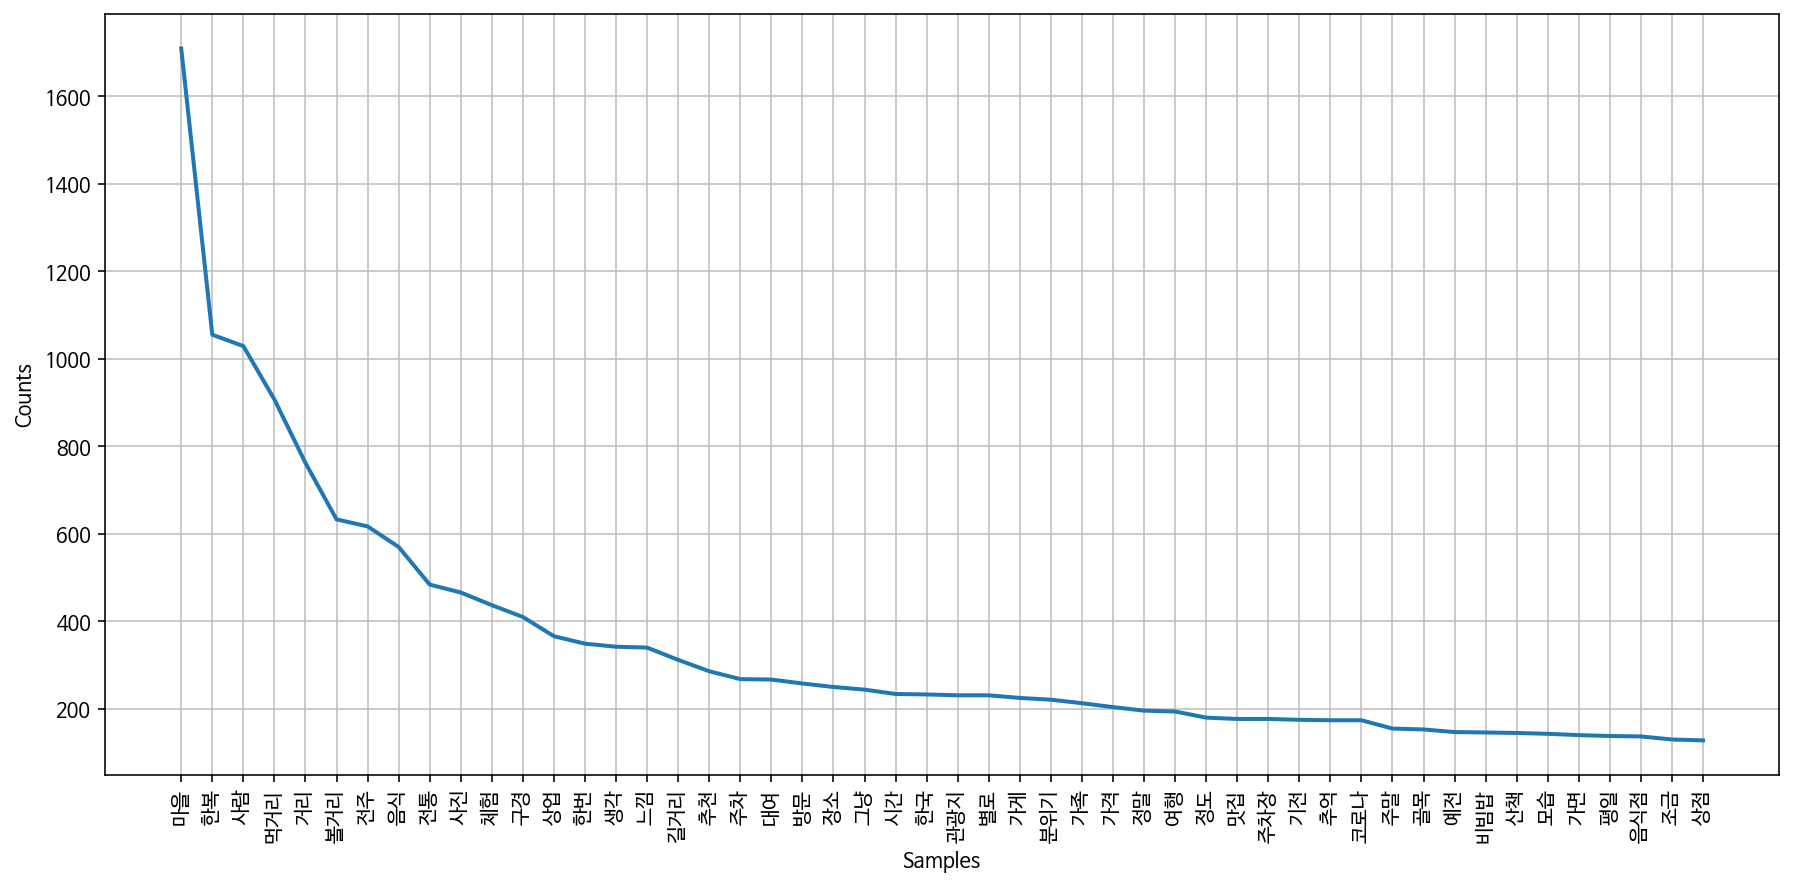

In [14]:
word_counted = nltk.Text(word_cleaned) 
plt.figure(figsize=(15, 7)) # plot 영역(그래프 영역)의 크기를 지정합니다.
word_counted.plot(50) # "plot" the graph, 상위 50개 단어를 보여줍니다.

In [15]:
# WordCloud 패키지를 import 합니다.
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image # 만약 "No module named 'PIL'" 에러가 발생하면 [ pip install Pillow==5.4.1 ] 로 라이브러리를 설치해줍니다.

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
# WordCloud 객체를 생성합니다.
# 아래 보이는 코드의 font_path 에 해당하는 부분이 워드클라우드의 폰트에 적용됩니다. (대체로 고딕 계열 폰트가 이쁘게 나옵니다)
# 만약 다른 폰트를 적용하려면, C > Windows > Fonts 폴더에 원하시는 폰트 파일(.ttf)을 넣은 후 아래 코드에서 font 이름을 수정해줍니다.

# 도화지 소환
word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", 
                       # font_path="C:/Windows/Fonts/NanumSquareB.ttf" <- 나눔스퀘어 폰트가 설치되어 있을 경우
                       # font_path="/System/Library/Fonts/Supplemental/AppleGothic.ttf <- MacOS의 경우
                       
                       width=2000, height=1000, # 이 부분을 수정하시면 실제 워드클라우드의 크기가 바뀝니다 (해상도가 바뀝니다)
                       prefer_horizontal= 1.0, # 이 부분의 주석을 해제하시면 단어들이 가로로만 그려지게 됩니다. (0~1)
                       background_color='white')

In [17]:
word_cloud.generate_from_frequencies(word_dic) # Generate wordcloud from word "frequency" data.
# 도화지 위에 freq 기준으로 그려라

# word_cloud.generate(text) : dict 가 아닌 줄글 텍스트 원문으로부터 워드클라우드를 만들 수도 있습니다.

OSError: ignored